In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


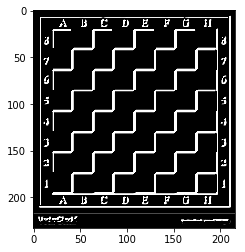

In [2]:
stripes = cv2.imread('images/chess.png', 0)
plt.imshow(stripes)

kernel1 = np.array([[ -1, 0, 1],
                 [ -2, 0, 2],
                 [ -1, 0, 1]])

filtered = cv2.filter2D(stripes, -1, kernel1+kernel1.T) #verticle edge matra detect garyo. .T le transform garxa.
plt.imshow(filtered, cmap="gray")

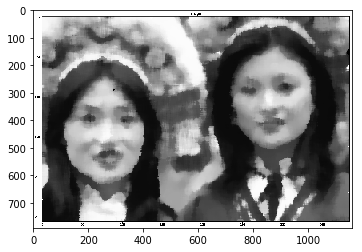

In [3]:
blurimg= cv2.imread('images/download.png', 0)
plt.imshow(blurimg, cmap='gray')

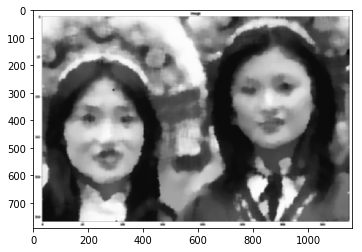

In [ ]:
kernel = np.ones([7, 7], dtype = np.float32)/49
blurred = cv2.filter2D(blurimg, -1, kernel)
plt.imshow(blurred, cmap='gray')

In [ ]:
noise = cv2.imread('images/noise.png', 0)
plt.imshow(noise, cmap='gray')

In [ ]:
blurred = cv2.filter2D(noise, -1, kernel)
plt.imshow(blurred, cmap='gray')


In [ ]:
blurred = cv2.blur(noise, (5, 5))
plt.imshow(blurred, cmap='gray')

In [ ]:
blurred = cv2.GaussianBlur(noise, (5, 5), -1) # -1 vanya depth
plt.imshow(blurred, cmap='gray')

In [ ]:
blurred = cv2.medianBlur(noise, 9) #9 vanya kati % chai garne
plt.imshow(blurred, cmap='gray')

# Canny Edge Detector

In [ ]:
low = 25
high = 250


canny_img = cv2.Canny(stripes, low, high)

plt.imshow(canny_img, cmap='gray')

# Haar Cascade

In [ ]:
cascade_dir="D:\Anaconda\Lib\site-packages\cv2\data/"

In [ ]:
img = cv2.imread("images/xmen.jpg", 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier(cascade_dir + 'haarcascade_frontalface_default.xml')


eye_cascade = cv2.CascadeClassifier(cascade_dir + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  #Img chai rgb xa gray image gray ma xa
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))


In [ ]:
# Open Camera
cap = cv2.VideoCapture(0)

# While camera is on
while True:

    # Take each frame
    ret, frame = cap.read()

    # Convert BGR to HSV
    gray_fname = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    
    
    cv2.imshow('Frame',frame)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
    cv2.imshow('Frame',frame)

cap.release()
cv2.destroyAllWindows()


In [ ]:
model_json = model.to_json()
with open("modell.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modell.h5")
print("Saved model to disk")